In [1]:
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('apple_quality.csv')

In [2]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [3]:
df[df.A_id.isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [4]:
df = df.dropna()
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df = df.drop(columns=['A_id'])
df.Quality.unique()

array(['good', 'bad'], dtype=object)

In [6]:
df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})

df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


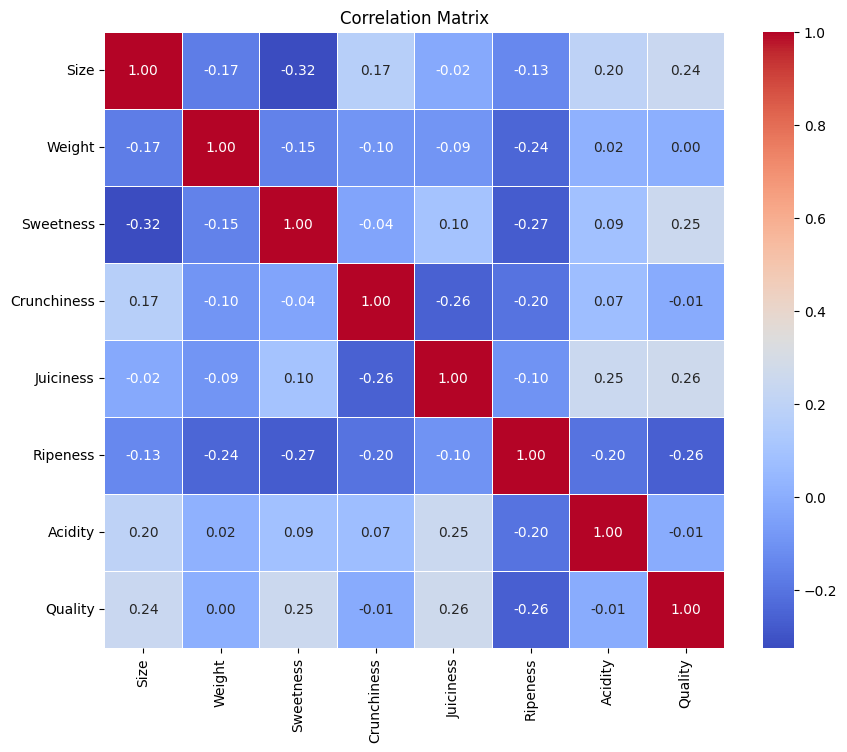

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
X = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
svm_linear_model = SVC(C=1.5, random_state=42) 
svm_linear_model.fit(X_train, y_train) 
y_pred_linear_svm = svm_linear_model.predict(X_test) 
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)

In [10]:
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
svm_pca_model = SVC(C=1.5, kernel='linear')
svm_pca_model.fit(X_train_pca, y_train) 
y_pred_pca_svm = svm_pca_model.predict(X_test_pca)
accuracy_pca_svm = accuracy_score(y_test, y_pred_pca_svm) 

In [12]:
print("Acuratețea SVM fără PCA: {:.2f}".format(accuracy_linear_svm))
print("Acuratețea SVM cu PCA: {:.2f}".format(accuracy_pca_svm)) 

Acuratețea SVM fără PCA: 0.91
Acuratețea SVM cu PCA: 0.76


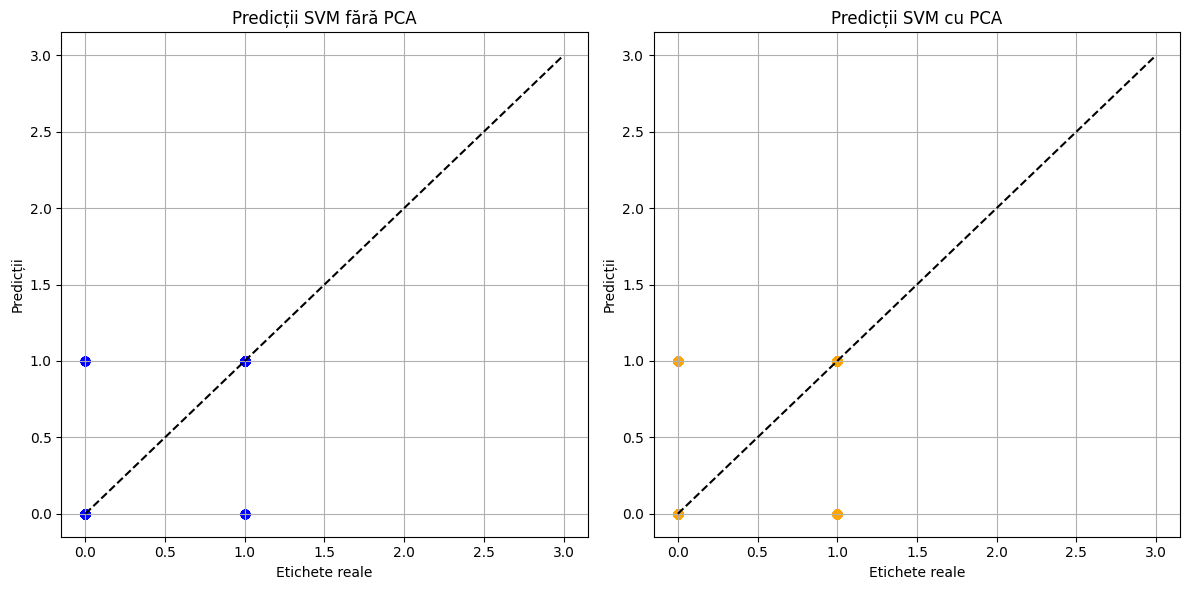

In [13]:
# Afișarea predicțiilor vs. etichetele reale pentru SVM fără PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear_svm, color='blue', alpha=0.5)
plt.plot([0, 3], [0, 3], '--k')  # Linia de referință (identitate)
plt.title('Predicții SVM fără PCA')
plt.xlabel('Etichete reale')
plt.ylabel('Predicții')
plt.grid(True)

# Afișarea predicțiilor vs. etichetele reale pentru SVM cu PCA
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_pca_svm, color='orange', alpha=0.5)
plt.plot([0, 3], [0, 3], '--k')  # Linia de referință (identitate)
plt.title('Predicții SVM cu PCA')
plt.xlabel('Etichete reale')
plt.ylabel('Predicții')
plt.grid(True)

plt.tight_layout()
plt.show()

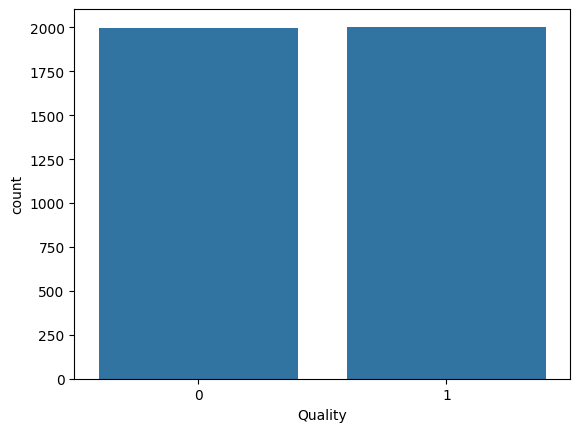

In [14]:
sns.countplot(x='Quality', data=df)
plt.show()

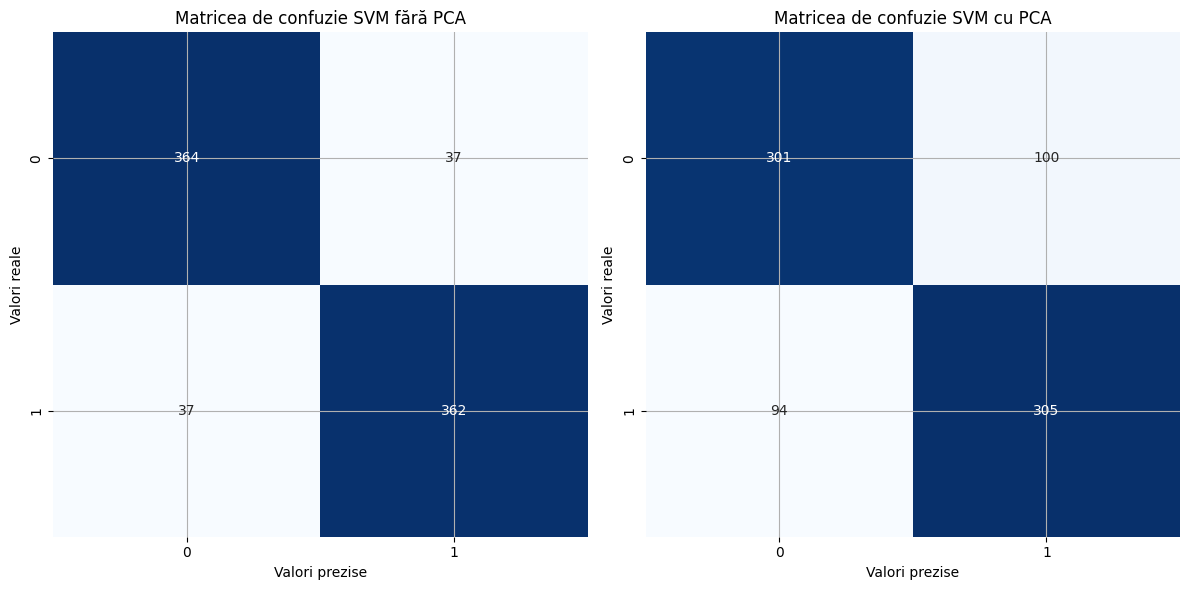

In [15]:
# Afișarea matricei de confuzie pentru SVM fără PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_linear_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matricea de confuzie SVM fără PCA')
plt.xlabel('Valori prezise')
plt.ylabel('Valori reale')
plt.grid(True)

# Afișarea matricei de confuzie pentru SVM cu PCA
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_pca_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matricea de confuzie SVM cu PCA')
plt.xlabel('Valori prezise')
plt.ylabel('Valori reale')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
classification_rep_svm = classification_report(y_test, y_pred_linear_svm)
print("Raportul de clasificare pentru SVM fără PCA: \n", classification_rep_svm)

classification_rep_svm_pca = classification_report(y_test, y_pred_pca_svm)
print("Raportul de clasificare pentru SVM cu PCA: \n", classification_rep_svm_pca)

Raportul de clasificare pentru SVM fără PCA: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       401
           1       0.91      0.91      0.91       399

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Raportul de clasificare pentru SVM cu PCA: 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       401
           1       0.75      0.76      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



<Axes: xlabel='Size', ylabel='Sweetness'>

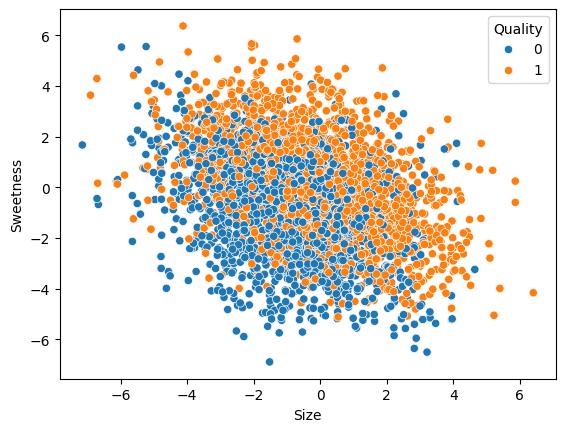

In [17]:
sns.scatterplot(df, x='Size', y='Sweetness', hue='Quality')

<Axes: xlabel='Size', ylabel='Juiciness'>

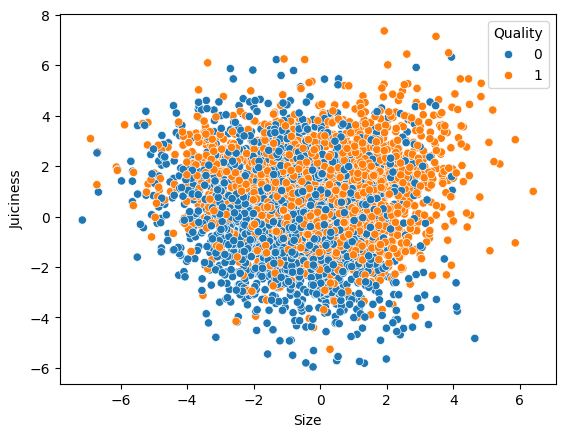

In [18]:
sns.scatterplot(df, x='Size', y='Juiciness', hue='Quality')

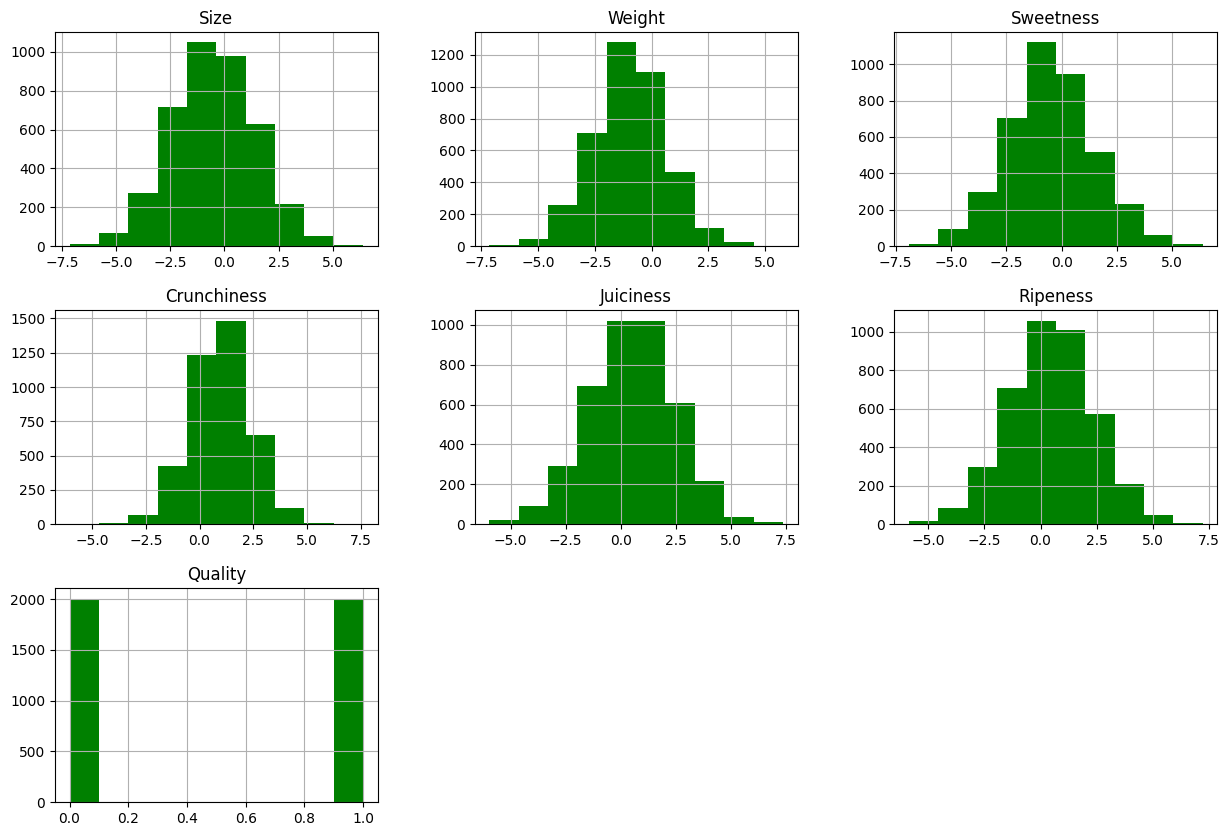

In [19]:
df.hist(figsize=(15, 10), color='green');

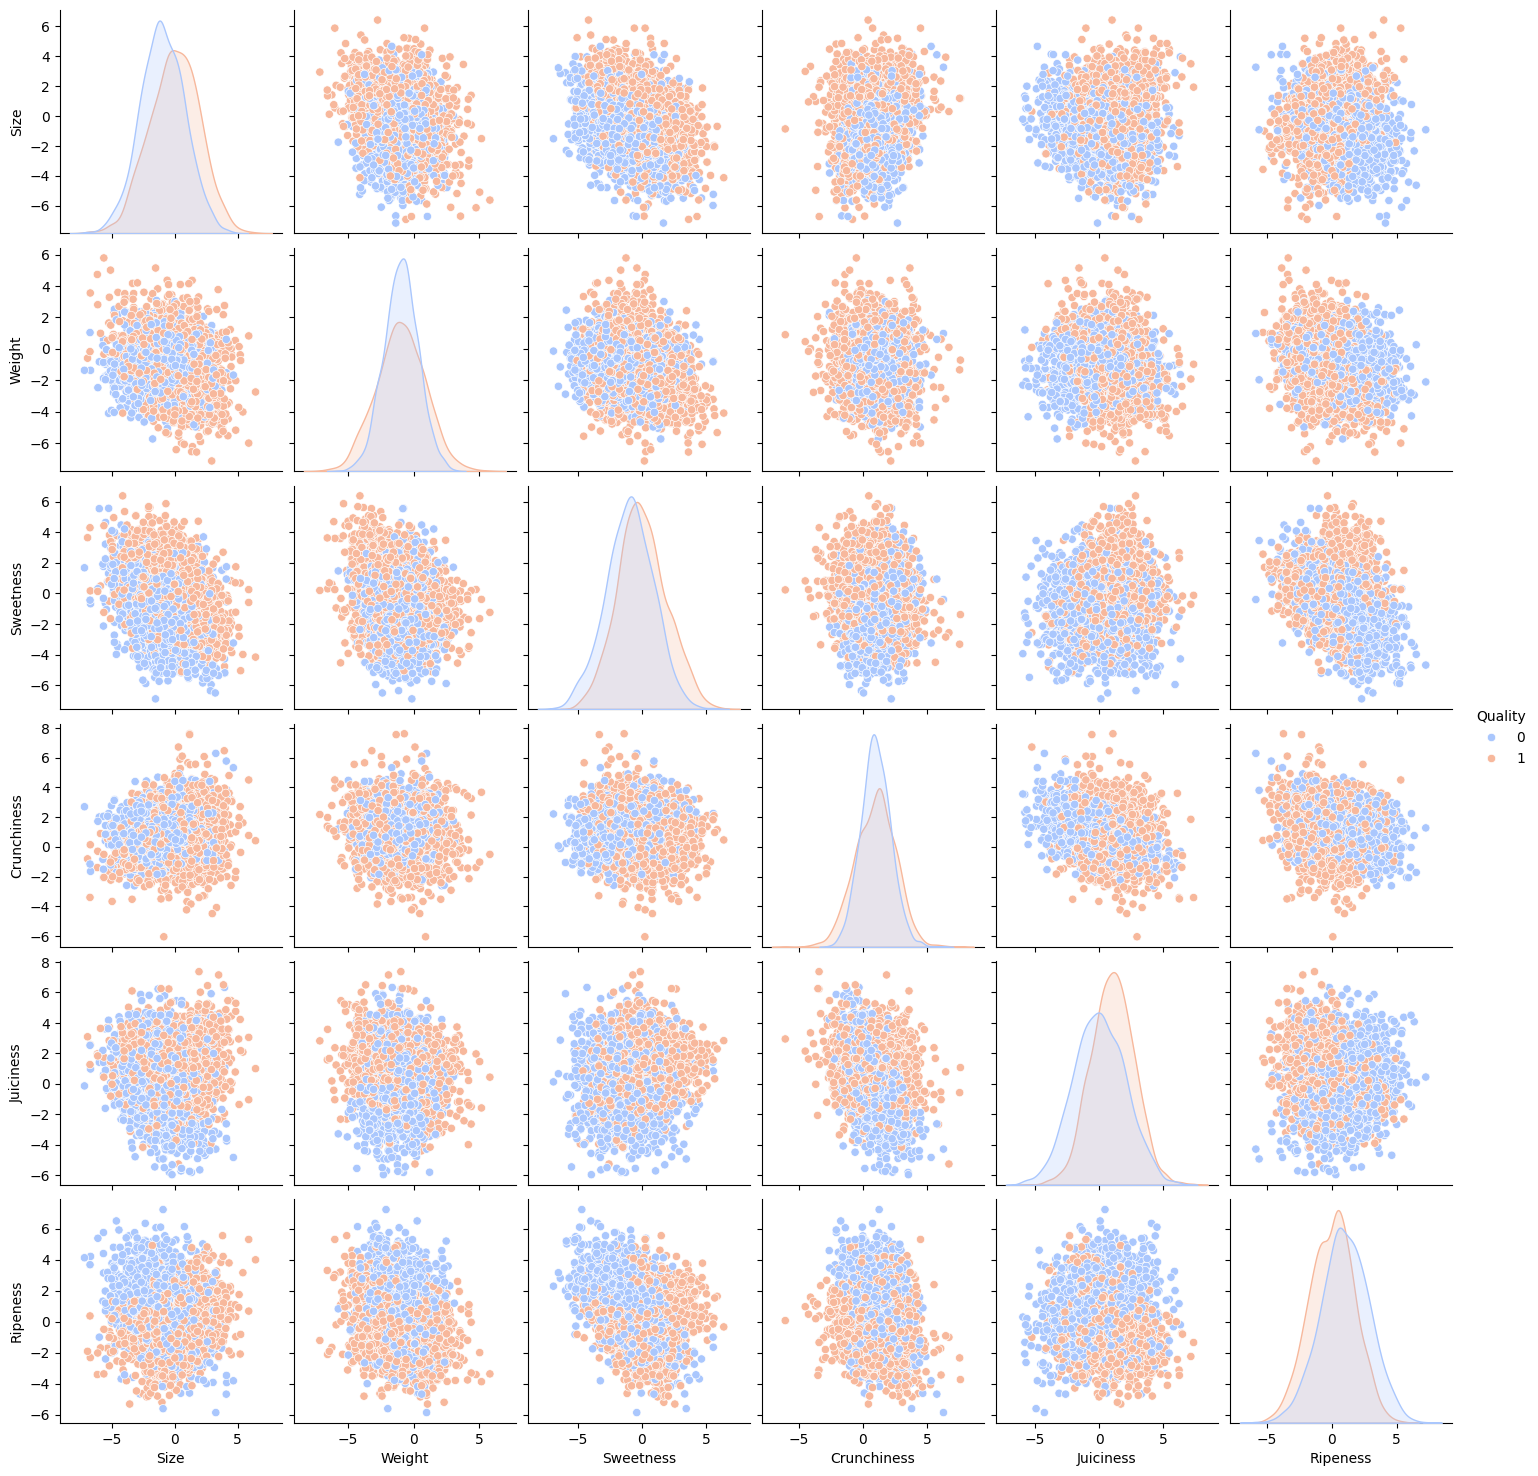

In [20]:
sns.pairplot(df, hue='Quality', palette='coolwarm')
